# Plots and analysis

## Imports

In [268]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit
pd.options.mode.chained_assignment = None # Stop seeing warnings

In [269]:
df = pd.read_pickle("data/df")

## Comparing means of LDL and HL between HA and control across frequencies
- T-test LDL per group per frequency
- LDL mean per group per frequency (pointplot)
- LDL mean per group per frequency (boxplot)
- T-test HL per group per frequency
- HL mean per group per frequency (pointplot)
- HL mean per group per frequency (boxplot)

### Preprocessing for this area

In [270]:
df = df[['Código de participante','Group', 'TWI', 'OPI', 'LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000', 'Avg_LDL', 'Avg_HL_L', 'Avg_HL_R',
       'Avg_HL']]

Cannot run with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [271]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TWI,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
17,AC11,HA,121.067145,0.140000,65.0,90.0,90.0,90.0,90.0,80.0,...,10.0,10.0,5.0,10.0,15.0,-5.0,84.166667,7.500000,9.166667,7.500000
37,AC31,HA,212.152903,0.033333,80.0,80.0,85.0,80.0,75.0,65.0,...,5.0,5.0,0.0,5.0,5.0,-5.0,77.500000,2.500000,5.833333,2.500000
11,AC05,HA,145.791627,0.493333,80.0,95.0,100.0,105.0,100.0,80.0,...,5.0,5.0,0.0,5.0,5.0,5.0,93.333333,4.166667,5.000000,4.166667
36,AC30,HA,175.928944,0.406667,75.0,60.0,85.0,85.0,75.0,70.0,...,10.0,15.0,15.0,15.0,5.0,10.0,75.000000,11.666667,11.666667,11.666667
25,AC19,HA,142.467822,0.486667,50.0,60.0,60.0,50.0,30.0,30.0,...,-5.0,0.0,0.0,0.0,0.0,0.0,46.666667,1.666667,-0.833333,-0.833333
23,AC17,HA,208.416910,0.606667,45.0,55.0,65.0,45.0,60.0,40.0,...,10.0,10.0,15.0,5.0,10.0,0.0,51.666667,9.166667,8.333333,8.333333
27,AC21,HA,135.635361,0.320000,80.0,75.0,95.0,90.0,90.0,95.0,...,0.0,-5.0,0.0,0.0,-5.0,5.0,87.500000,-0.833333,0.833333,-0.833333
9,AC03,HA,135.210442,0.266667,80.0,100.0,90.0,95.0,100.0,100.0,...,10.0,10.0,5.0,5.0,5.0,5.0,94.166667,6.666667,7.500000,6.666667
49,GC001,Control,190.209297,0.693333,40.0,45.0,45.0,50.0,40.0,20.0,...,5.0,0.0,0.0,0.0,-5.0,-10.0,40.000000,-1.666667,0.833333,-1.666667
40,AC34,HA,101.080018,0.146667,60.0,70.0,80.0,50.0,45.0,25.0,...,0.0,0.0,5.0,5.0,0.0,-10.0,55.000000,0.000000,2.500000,0.000000


### Loudness Discomfort Level (LDL) between groups

#### Preprocessing for these plots

In [272]:
df_pointplots = df[['Código de participante', 'Group','LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000']]

In [273]:
# Split groups
df_pointplots_HA= df_pointplots[df_pointplots["Group"]=="HA"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for HA
df_pointplots_HA = pd.melt(df_pointplots_HA, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_ldl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_ldl

,Código de participante,variable,value,Group
0,AC01,LDL_250,60.0,HA
1,AC02,LDL_250,80.0,HA
2,AC03,LDL_250,80.0,HA
3,AC05,LDL_250,80.0,HA
4,AC06,LDL_250,80.0,HA
...,...,...,...,...
7,GC003,LDL_2000,110.0,Control
8,GC001,LDL_4000,40.0,Control
9,GC003,LDL_4000,85.0,Control
10,GC001,LDL_8000,20.0,Control


In [274]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "Frequency", "Db", "Group"]

#### T tests

In [275]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [276]:
df_HA = df_pointplots[df_pointplots["Group"]=="HA"]
df_Control = df_pointplots[df_pointplots["Group"]=="Control"]

freqs = ["LDL_250","LDL_500","LDL_1000","LDL_2000",
         "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))  

t test for LDL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.631327,1.060161,two-sided,0.636585,"[-212.92, 238.54]",0.848478,0.6,0.186465


t test for LDL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.302669,1.055926,two-sided,0.810816,"[-304.38, 321.25]",0.417865,0.553,0.082058


t test for LDL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.401493,1.048199,two-sided,0.754503,"[-334.03, 358.4]",0.584832,0.563,0.113612


t test for LDL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.112522,1.075213,two-sided,0.927674,"[-326.1, 332.97]",0.138996,0.541,0.053495


t test for LDL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.761917,1.16508,two-sided,0.570281,"[-196.11, 231.74]",0.689253,0.63,0.139083


t test for LDL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.316423,1.05004,two-sided,0.802946,"[-447.21, 472.84]",0.454798,0.554,0.088079


#### Plots

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/902036402.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


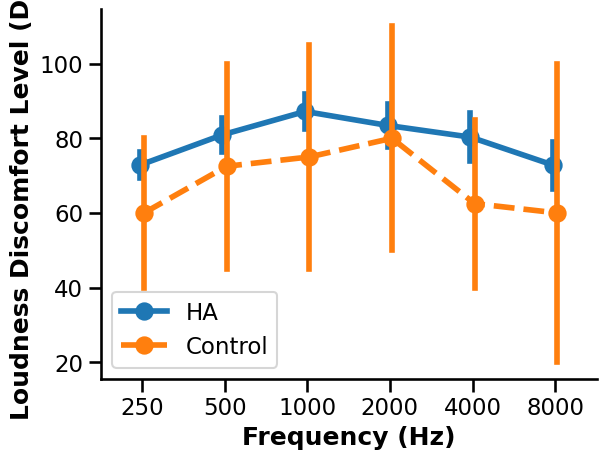

In [277]:
sns.set_context("talk")

fig = sns.pointplot(data=df_pointplots_ldl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/720931620.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


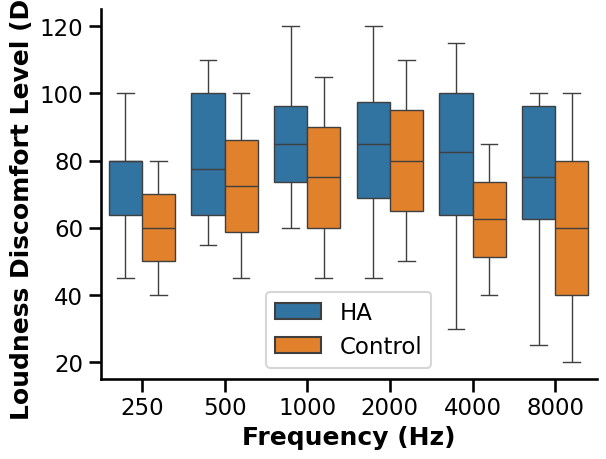

In [278]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_ldl,x='Frequency', y = "Db", hue="Group", 
              dodge=True)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

### Hearing Level (HL) between groups

#### Preprocessing
dataset must be in melt form

In [279]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
7,AC01,HA,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
8,AC02,HA,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
9,AC03,HA,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
11,AC05,HA,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0
12,AC06,HA,80.0,100.0,120.0,115.0,115.0,100.0,L,0.0,...,5.0,-5.0,0.0,-10.0,5.0,5.0,5.0,-5.0,0.0,-10.0


In [280]:
# Split groups
df_pointplots_HA= df_pointplots[df_pointplots["Group"]=="HA"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for HA
df_pointplots_HA = pd.melt(df_pointplots_HA, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_HA["Group"] = "HA"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])

df_pointplots_hl

,Código de participante,variable,value,Group
0,AC01,HL_250,10.0,HA
1,AC02,HL_250,10.0,HA
2,AC03,HL_250,10.0,HA
3,AC05,HL_250,5.0,HA
4,AC06,HL_250,5.0,HA
...,...,...,...,...
7,GC003,HL_2000,30.0,Control
8,GC001,HL_4000,-5.0,Control
9,GC003,HL_4000,10.0,Control
10,GC001,HL_8000,-10.0,Control


In [281]:
df_pointplots_hl.columns = ["ID", "Frequency", "Db", "Group"]

#### T-tests

In [282]:
df_HA = df_pointplots[df_pointplots["Group"]=="HA"]
df_Control = df_pointplots[df_pointplots["Group"]=="Control"]

freqs = ["HL_250","HL_500","HL_1000","HL_2000",
         "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_HA[frequency], df_Control[frequency]))  

t test for HL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.104447,2.026216,two-sided,0.926236,"[-13.03, 12.4]",0.048622,0.541,0.050427


t test for HL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.294935,1.259094,two-sided,0.809229,"[-40.43, 43.55]",0.222939,0.552,0.059019


t test for HL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,1.121768,two-sided,1.0,"[-76.18, 76.18]",0.0,0.539,0.05


t test for HL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.664211,1.014866,two-sided,0.625428,"[-194.8, 174.8]",1.371989,0.607,0.405136


t test for HL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.327327,1.075347,two-sided,0.795611,"[-79.86, 84.86]",0.404061,0.555,0.079945


t test for HL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.212225,1.128475,two-sided,0.863741,"[-98.31, 102.68]",0.212316,0.546,0.058176


#### Plots

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/3399500249.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


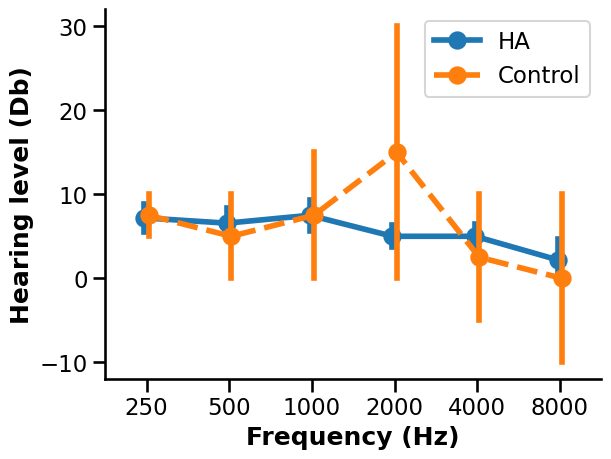

In [283]:
sns.set_context("talk")

fig = sns.pointplot(data=df_pointplots_hl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
#plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
#plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000']) 
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})
fig.set_ylabel("Hearing level (Db)", fontdict={'weight': 'bold'})
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/1325980745.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


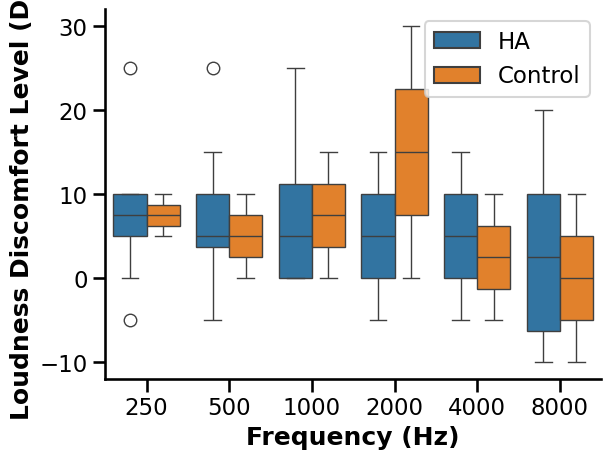

In [284]:
sns.set_context("talk")
fig = sns.boxplot(data=df_pointplots_hl,x='Frequency', y = "Db", hue="Group")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel("Loudness Discomfort Level (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

## Comparing means of OPI and TWI between HA and control
- T-test OPI per group
- OPI per group (boxplot)
- T-test TWI per group
- TWI per group (boxplot)

In [285]:
df = pd.read_pickle("data/df")

In [286]:
df_HA = df[df["Group"]=="HA"]
df_Control = df[df["Group"]=="Control"]

measurement = "OPI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for OPI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.461697,2.189703,two-sided,0.686148,"[-0.93, 0.74]",0.451401,0.519,0.106447


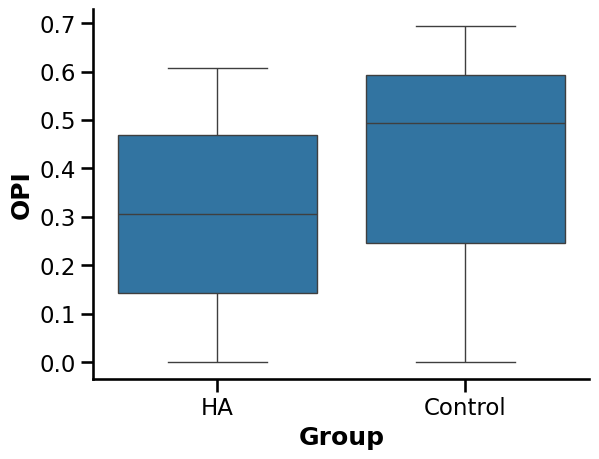

In [287]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='Group', y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})

plt.show()

In [288]:
measurement = "TWI"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

t test for TWI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.942848,1.095801,two-sided,0.285387,"[-506.24, 346.34]",2.086199,1.442,0.754022


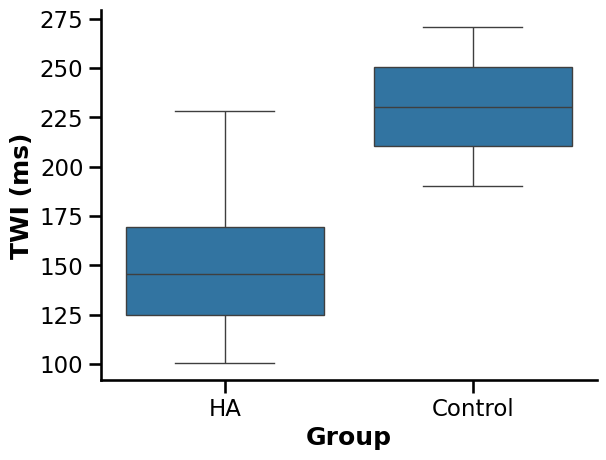

In [289]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='Group', y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})

plt.show()

## Compare differences between AQ scoring between experimental and control
No significant differences

In [290]:
df_HA = df[df["Group"]=="HA"]
df_Control = df[df["Group"]=="Control"]


print("t test for AQ score")
display(pg.ttest(df_HA["AQ_TOTAL"], df_Control["AQ_TOTAL"]))  

t test for AQ score


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.442861,2.131917,two-sided,0.698778,"[-6.12, 7.62]",0.459855,0.513,0.111601


## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- LDL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- HL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [291]:
df = pd.read_pickle("data/df")

### AQ X OPI, AQ X TWI

In [292]:
x = df["AQ_TOTAL"]
y = df["TWI"]

pg.corr(x,y).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,20,0.027,"[-0.42, 0.46]",0.91,0.278,0.051


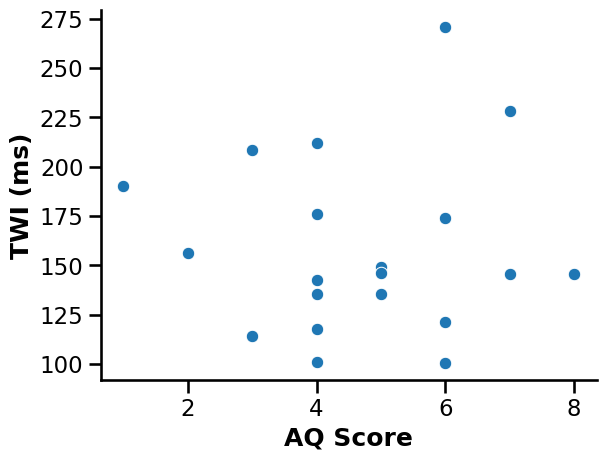

In [293]:
sns.set_context("talk")
sns.axes_style({'font.sans-serif':'Computer Modern Sans Serif'})

fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})

plt.show()

In [294]:
x = df["AQ_TOTAL"]
y = df["OPI"]

pg.corr(x,y).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,22,-0.487,"[-0.75, -0.08]",0.021,3.175,0.658


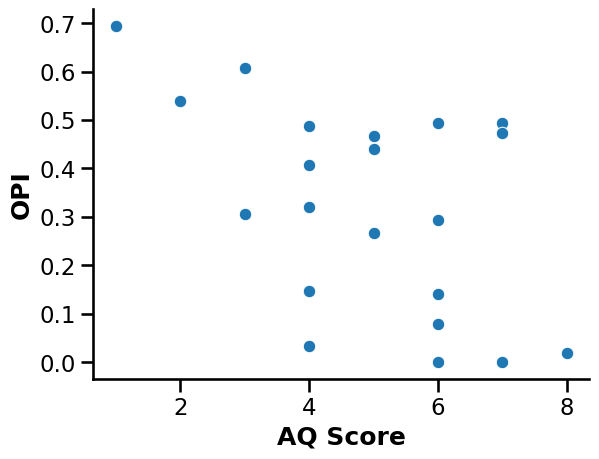

In [295]:
sns.set_context("talk")
fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
plt.show()

### AQ X LDL

t test for LDL_250


,n,r,CI95%,p-val,BF10,power
pearson,22,0.343897,"[-0.09, 0.67]",0.117091,0.839,0.356826


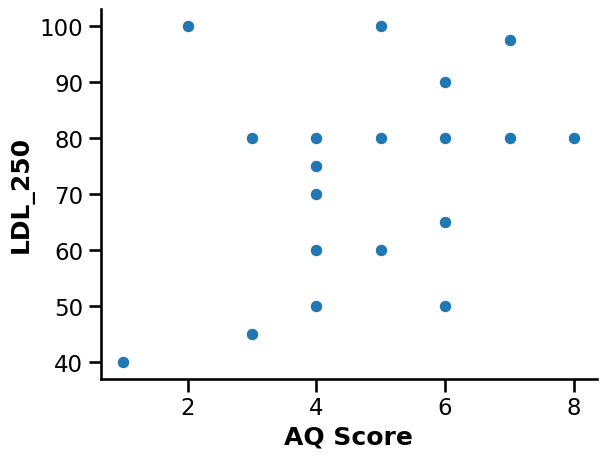

t test for LDL_500


,n,r,CI95%,p-val,BF10,power
pearson,22,0.492254,"[0.09, 0.76]",0.019954,3.365,0.668168


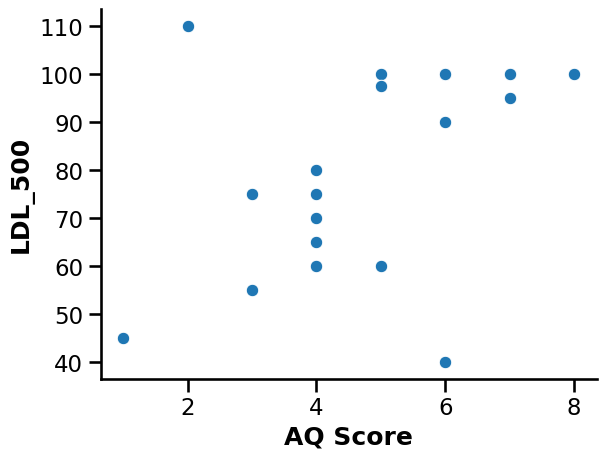

t test for LDL_1000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.547625,"[0.16, 0.79]",0.008336,6.935,0.779843


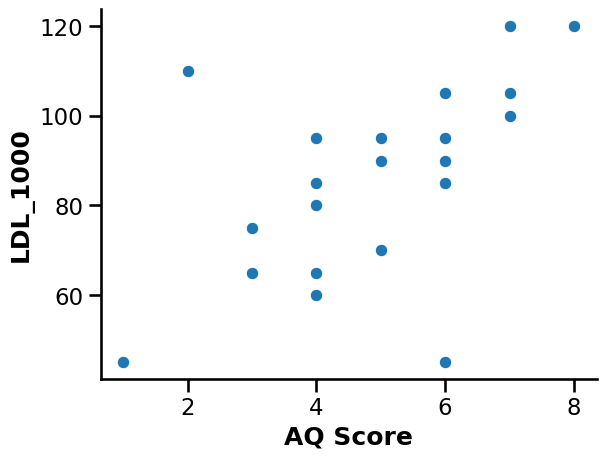

t test for LDL_2000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.541026,"[0.15, 0.78]",0.009321,6.316,0.767336


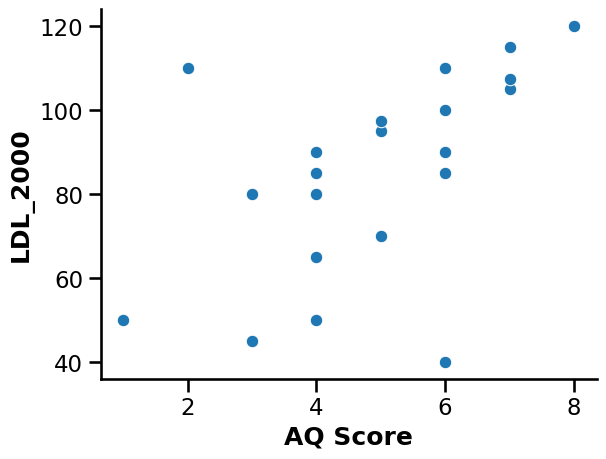

t test for LDL_4000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.442434,"[0.03, 0.73]",0.039221,1.949,0.560299


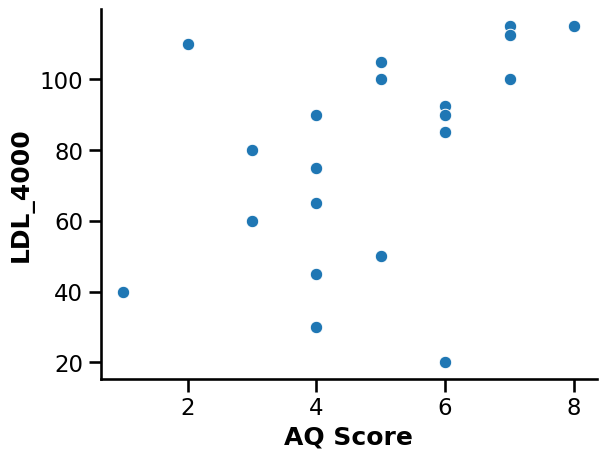

t test for LDL_8000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.49736,"[0.1, 0.76]",0.018516,3.578,0.678985


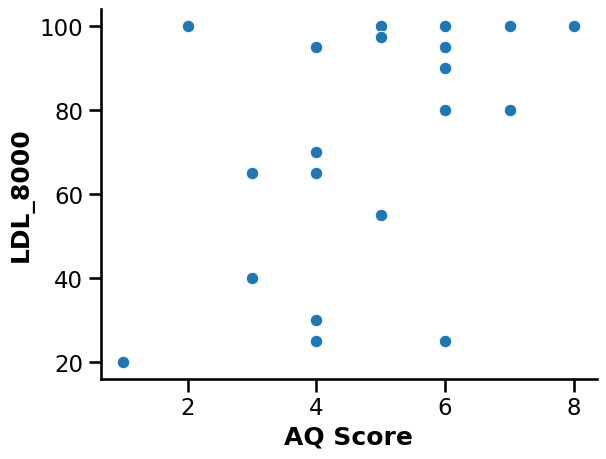

In [296]:
freqs = ["LDL_250","LDL_500","LDL_1000","LDL_2000",
         "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.corr(df[frequency], df["AQ_TOTAL"]))

    sns.set_context("talk")
    fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
    plt.show()

### AQ X HL

t test for HL_250


,n,r,CI95%,p-val,BF10,power
pearson,22,0.04316,"[-0.39, 0.46]",0.848752,0.269,0.053549


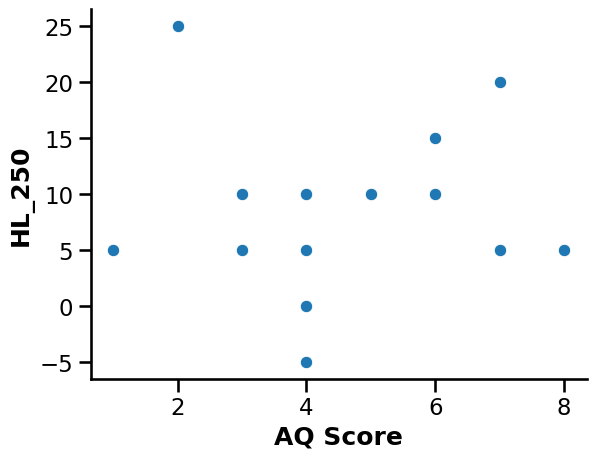

t test for HL_500


,n,r,CI95%,p-val,BF10,power
pearson,22,0.111744,"[-0.33, 0.51]",0.620538,0.297,0.078267


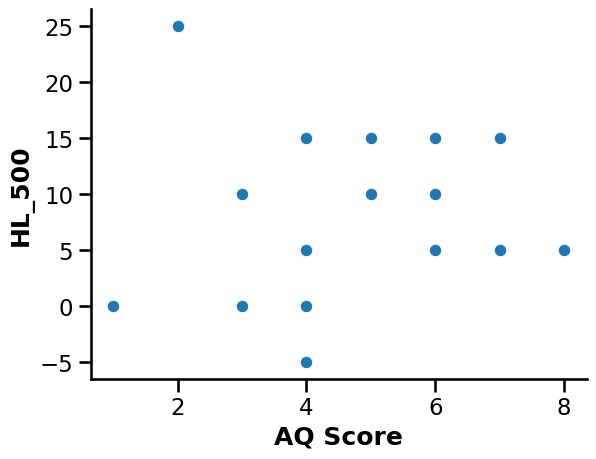

t test for HL_1000


,n,r,CI95%,p-val,BF10,power
pearson,22,-0.048287,"[-0.46, 0.38]",0.831023,0.27,0.054618


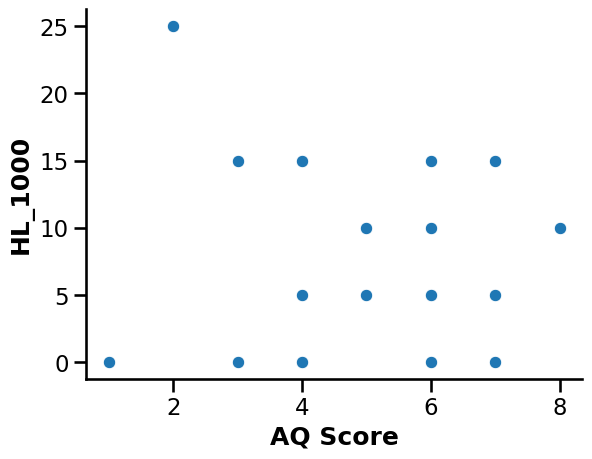

t test for HL_2000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.245044,"[-0.2, 0.6]",0.27171,0.467,0.198668


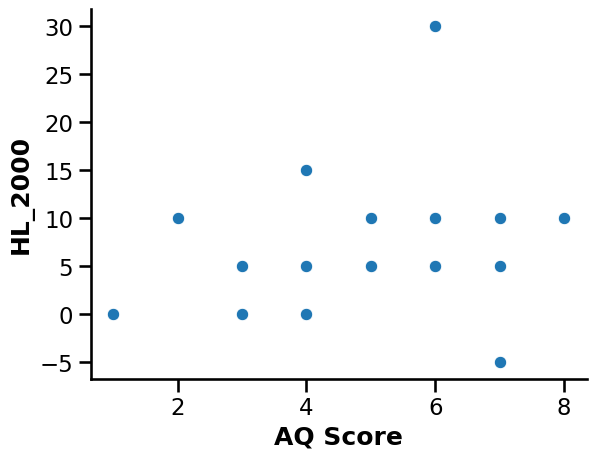

t test for HL_4000


,n,r,CI95%,p-val,BF10,power
pearson,22,0.086647,"[-0.35, 0.49]",0.701417,0.283,0.06656


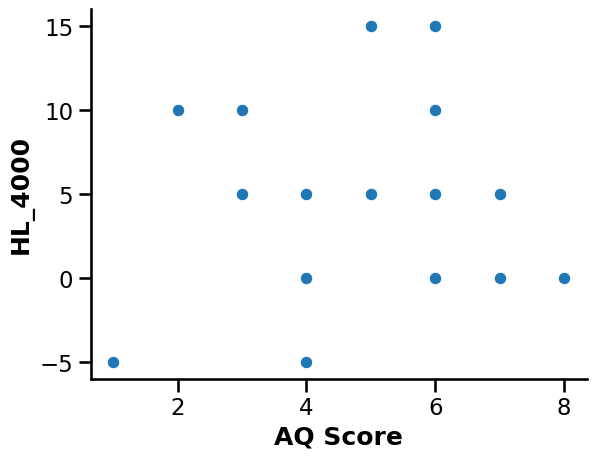

t test for HL_8000


,n,r,CI95%,p-val,BF10,power
pearson,22,-0.028578,"[-0.44, 0.4]",0.899539,0.266,0.051169


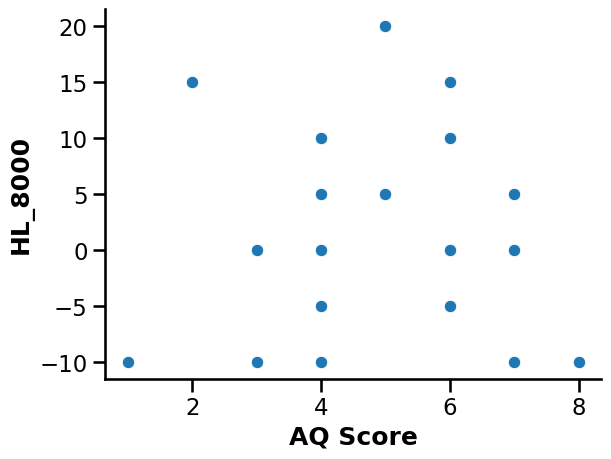

In [297]:
freqs = ["HL_250","HL_500","HL_1000","HL_2000",
         "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.corr(df[frequency], df["AQ_TOTAL"]))

    sns.set_context("talk")
    fig = sns.scatterplot(data = df, x = "AQ_TOTAL", y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={'weight': 'bold'})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [298]:
df_MC = df[df["AQ_MC"]==True]
df_NOT_MC = df[df["AQ_MC"]==False]

measurement = "OPI"
print("t test for %s" % (measurement))
display(pg.ttest(df_MC[measurement], df_NOT_MC[measurement]))

t test for OPI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.684764,15.91274,two-sided,0.111542,"[-0.34, 0.04]",0.747699,1.032,0.375267


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/1465052689.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


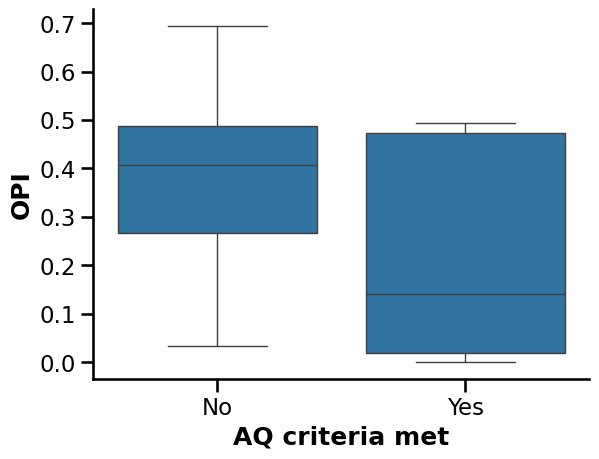

In [299]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='AQ_MC', y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ criteria met", fontdict={'weight': 'bold'})

plt.show()

In [300]:
measurement = "TWI"
print("t test for %s" % (measurement))
display(pg.ttest(df_MC[measurement], df_NOT_MC[measurement]))

t test for TWI


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.669886,8.226335,two-sided,0.521287,"[-40.37, 73.66]",0.368687,0.479,0.115637


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/515930654.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


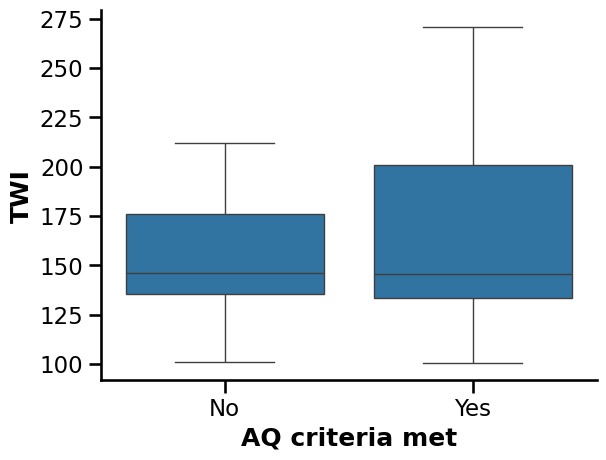

In [301]:
sns.set_context("talk")
fig = sns.boxplot(data=df,x='AQ_MC', y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("AQ criteria met", fontdict={'weight': 'bold'})

plt.show()

### Group differences (autism criteria vs no autism criteria) and HL mean and LDL mean per frequency

#### LDL

t test for LDL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.044855,19.93667,two-sided,0.308594,"[-7.26, 21.84]",0.426417,0.572,0.154984


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


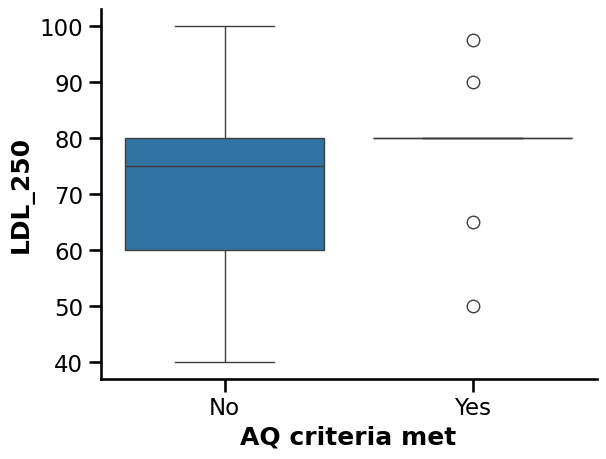

t test for LDL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.175241,17.096056,two-sided,0.043929,"[0.56, 36.23]",0.947371,1.893,0.547506


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


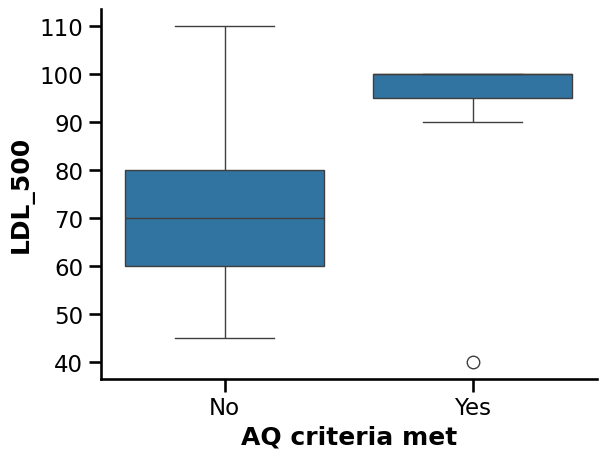

t test for LDL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.96946,14.357147,two-sided,0.068509,"[-1.53, 36.83]",0.89613,1.446,0.502841


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


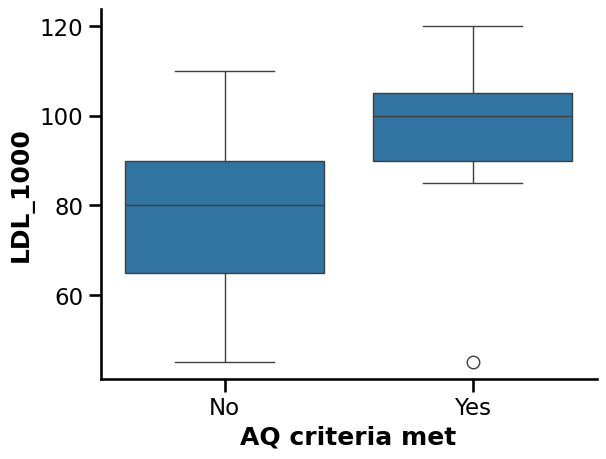

t test for LDL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.261514,15.845904,two-sided,0.038155,"[1.39, 43.65]",1.00472,2.131,0.596763


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


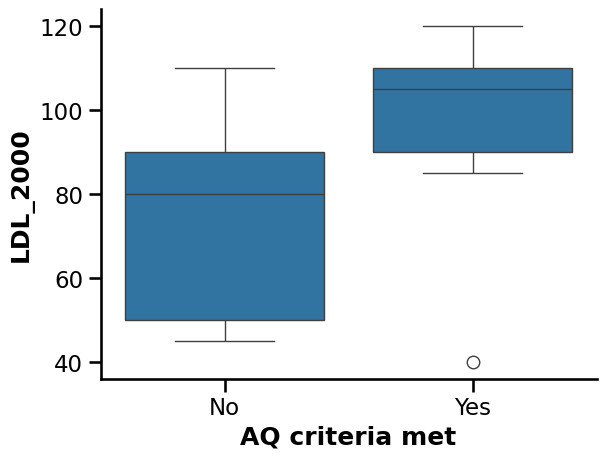

t test for LDL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.609727,15.839937,two-sided,0.127203,"[-6.17, 44.97]",0.715219,0.951,0.348634


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


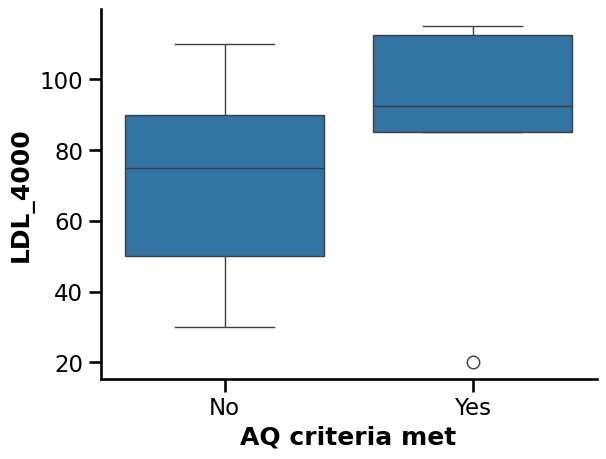

t test for LDL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.89361,19.15995,two-sided,0.073478,"[-2.25, 45.29]",0.793901,1.317,0.414189


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/2591931005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


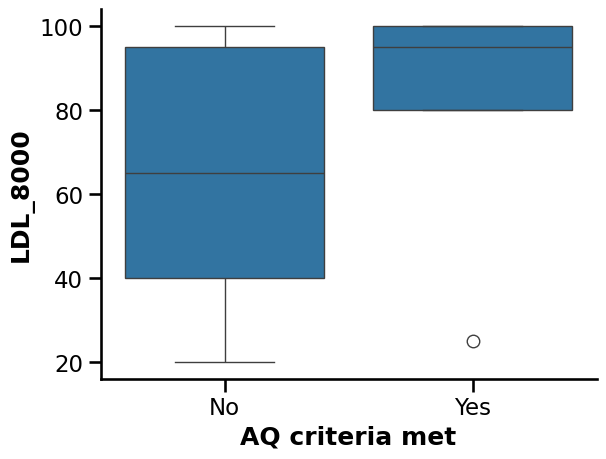

In [302]:
df_MC = df[df["AQ_MC"]==True]
df_NOT_MC = df[df["AQ_MC"]==False]

freqs = ["LDL_250","LDL_500","LDL_1000","LDL_2000",
         "LDL_4000", "LDL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_MC[frequency], df_NOT_MC[frequency]))

    fig = sns.boxplot(data=df,x='AQ_MC', y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_xticklabels(["No", "Yes"])
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ criteria met", fontdict={'weight': 'bold'})

    plt.show()

#### HL

t test for HL_250


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.030849,19.995646,two-sided,0.31492,"[-2.76, 8.14]",0.417734,0.566,0.150641


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


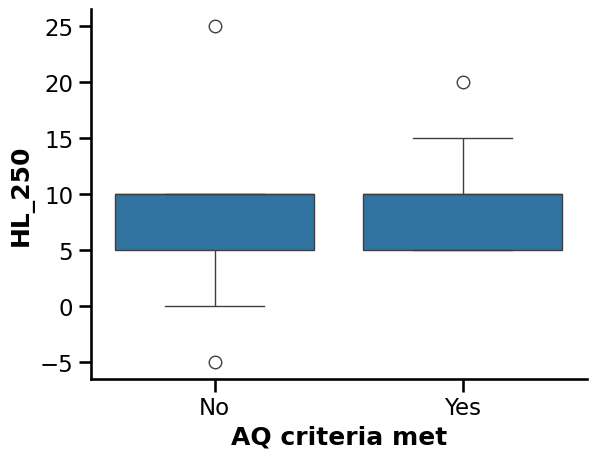

t test for HL_500


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.909065,19.360149,two-sided,0.374494,"[-3.28, 8.32]",0.356728,0.522,0.122787


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


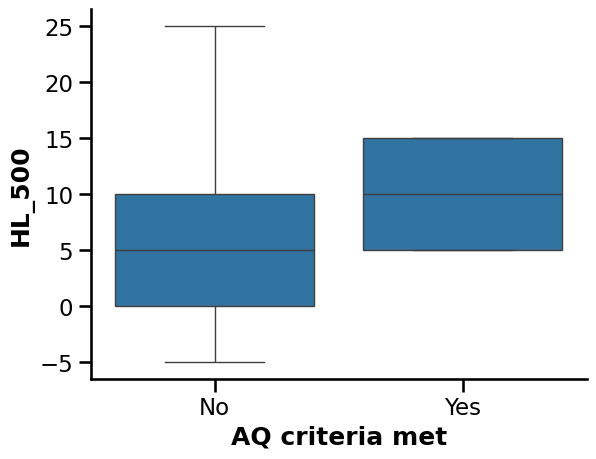

t test for HL_1000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.160725,19.981459,two-sided,0.873924,"[-6.57, 5.63]",0.065305,0.393,0.052363


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


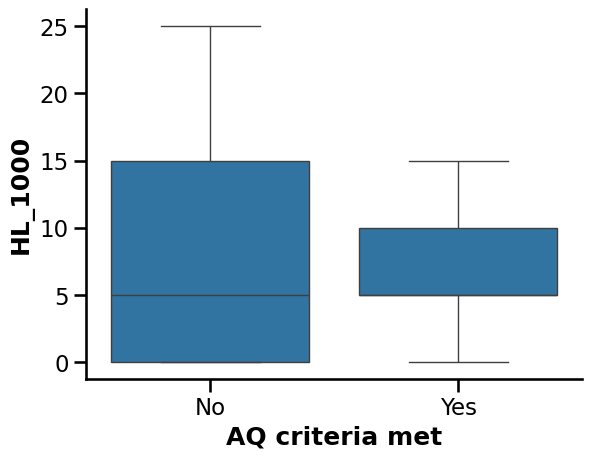

t test for HL_2000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.270257,10.950691,two-sided,0.230319,"[-3.14, 11.68]",0.616197,0.685,0.272466


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


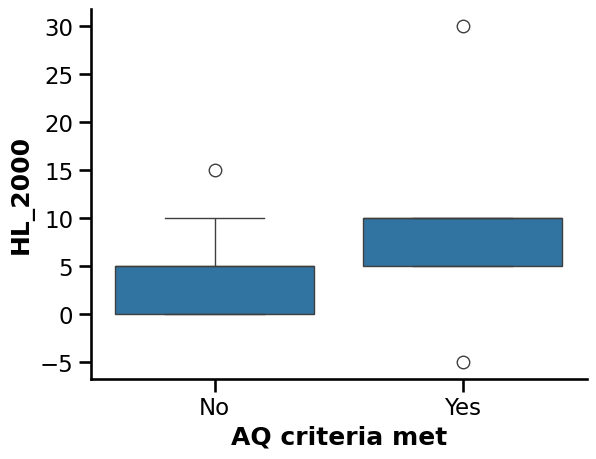

t test for HL_4000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.46773,17.837841,two-sided,0.645642,"[-4.03, 6.34]",0.201211,0.421,0.07268


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


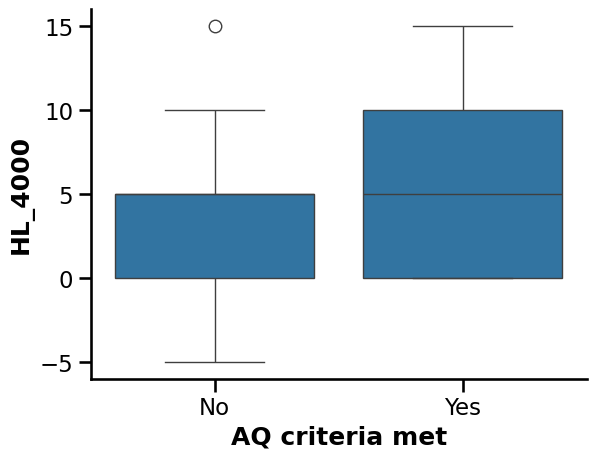

t test for HL_8000


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.548137,18.814017,two-sided,0.590043,"[-10.3, 6.03]",0.23156,0.433,0.080147


/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/822711913.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


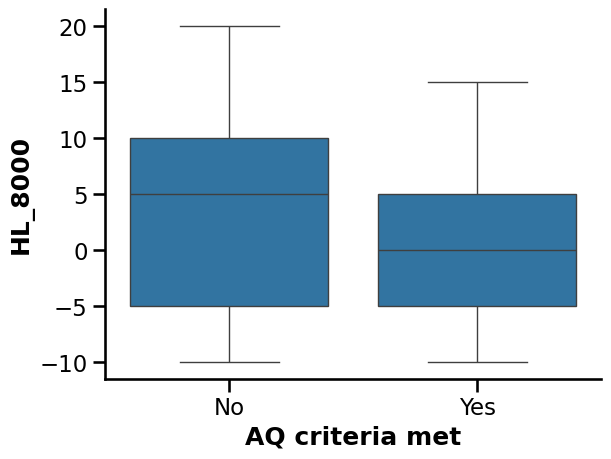

In [303]:
df_MC = df[df["AQ_MC"]==True]
df_NOT_MC = df[df["AQ_MC"]==False]

freqs = ["HL_250","HL_500","HL_1000","HL_2000",
         "HL_4000", "HL_8000"]

for frequency in freqs:
    print("t test for %s" % (frequency))
    display(pg.ttest(df_MC[frequency], df_NOT_MC[frequency]))

    fig = sns.boxplot(data=df,x='AQ_MC', y = frequency)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.set_xticklabels(["No", "Yes"])
    fig.set_ylabel(frequency, fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
    fig.set_xlabel("AQ criteria met", fontdict={'weight': 'bold'})

    plt.show()

## Correlations between audiometry measurements and double flash illusion
- Average LDL across frequenciess x TWI (plot and correlation)
- Average LDL across frequenciess x OPI (plot and correlation)
- Average HL across frequenciess x TWI (plot and correlation)
- Average HL across frequencies x OPI (plot and correlation)

,n,r,CI95%,p-val,BF10,power
pearson,18,0.114453,"[-0.37, 0.55]",0.651116,0.32,0.073341


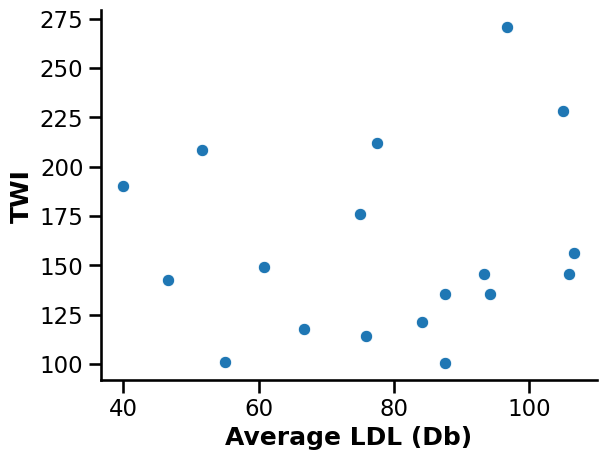

In [304]:
x = "Avg_LDL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data = df, x =x, y = y)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xlabel("Average LDL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={'weight': 'bold'})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,20,-0.138284,"[-0.55, 0.32]",0.560965,0.324,0.089485


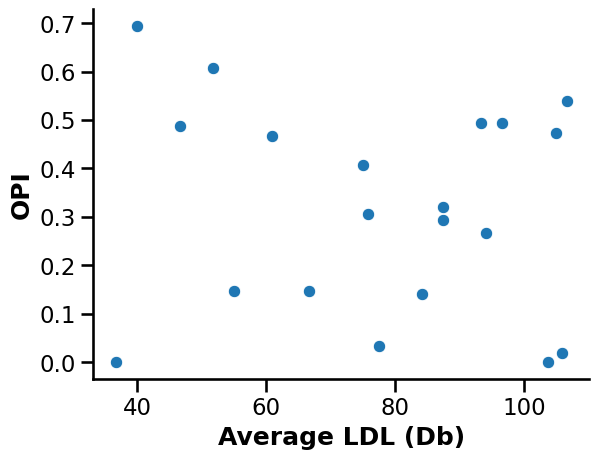

In [305]:
x = "Avg_LDL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data = df, x =x, y = y)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xlabel("Average LDL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={'weight': 'bold'})
plt.show()

### AvgHL most sensitive ear x OPI

,n,r,CI95%,p-val,BF10,power
pearson,18,0.179057,"[-0.31, 0.6]",0.477137,0.369,0.110064


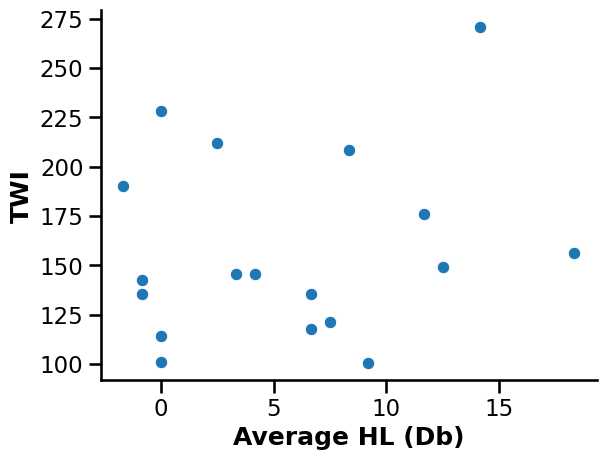

In [306]:
x = "Avg_HL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data = df, x =x, y = y)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xlabel("Average HL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={'weight': 'bold'})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,20,0.105449,"[-0.35, 0.52]",0.658159,0.303,0.07233


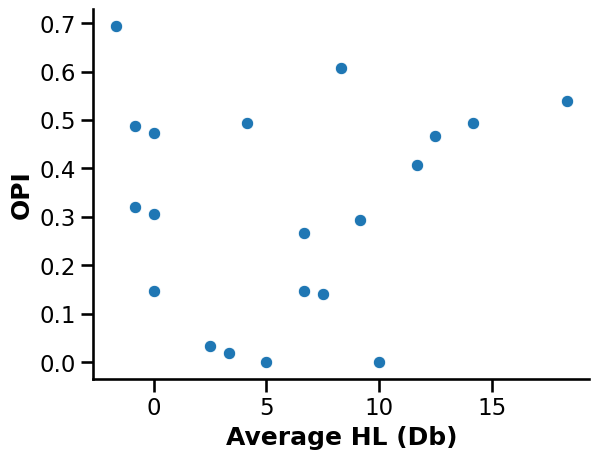

In [307]:
x = "Avg_HL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data = df, x =x, y = y)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xlabel("Average HL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={'weight': 'bold'})
plt.show()


## Group Sigmoid plot

### Preprocessing

In [308]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid")

soas = [34.0, 51.0, 68.0, 85.0, 102.0, 119.0, 
        136.0, 153.0, 170.0, 187.0, 204.0, 
        221.0, 238.0, 255.0, 272.0] # inter beep delay in experiment


In [309]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1] 

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1] 

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({'x': x, 'y': y_control})
df_ha = pd.DataFrame({'x': x, 'y': y_ha})

### Plot

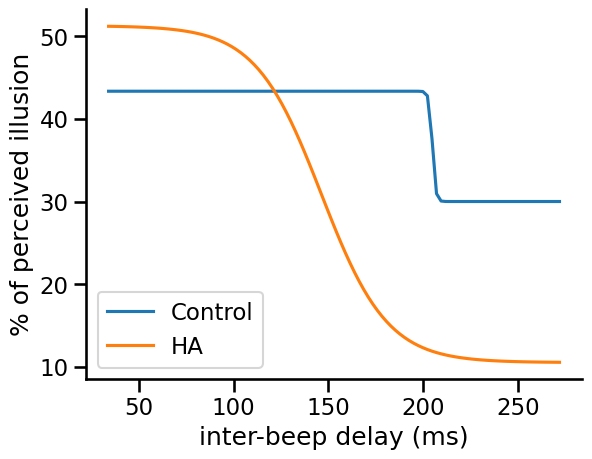

In [310]:
# Plot the sigmoid function
fig = sns.lineplot(data = df_control, x="x", y="y", label="Control")
fig = sns.lineplot(data = df_ha, x="x", y="y", label="HA")

plt.xlabel('inter-beep delay (ms)')
plt.ylabel('% of perceived illusion')
plt.legend()
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.show()

## Conference plots
- Descriptives
- Avg LDL and Avg HL boxplot & t test
- TWI con HA y línea punteada de Avg controls (con referencia, Individual differences cecere.)
- TWI con HA y linea punteada de low schizotypy group (high proneness (ferri))
- OPI con HA y linea punteada de low schizotypy group (high proneness (ferri))
- HL mean HA vs healthy person range
- HL mean HA vs mean young adults Korea

### Imports and preprocess

In [311]:
df = pd.read_pickle("data/df")

In [312]:

df.loc[df["Group"] == "HA", "Group"] = "AC" # rename columns
df_HA["Group"] = "AC"
df_Control = df[df["Group"]=="Control"]


### Descriptives

In [313]:
df.groupby("Group").describe()

Age                                                    AQ_TOTAL  \
        count       mean       std   min   25%   50%   75%   max    count   
Group                                                                       
AC       24.0  17.166667  0.761387  16.0  17.0  17.0  18.0  18.0     24.0   
Control   3.0  18.666667  0.577350  18.0  18.5  19.0  19.0  19.0      3.0   

                   ...  Avg_HL_R            Avg_HL                      \
             mean  ...       75%        max  count      mean       std   
Group              ...                                                   
AC       5.083333  ...  9.583333  18.333333   19.0  6.096491  5.248843   
Control  4.333333  ...  9.583333  14.166667    3.0  5.833333  7.949493   

                                                            
              min       25%       50%       75%        max  
Group                                                       
AC      -0.833333  1.250000  6.666667  8.750000  18.333333  
Control -1.666667  1.666667  5.000000  9.583333  14.166667  

[2 rows x 256 columns]

In [314]:
df.groupby(["Group","Scholarship"]).count()

Código de participante  Sex  \
Group   Scholarship                                                           
AC      Beca Lucet                                                   2    2   
        Becas Lucet                                                  1    1   
        Si, Becas Lucet (PUCP)                                       1    1   
        Si, soy beneficiario de la beca Lucet.                       1    1   
        Sí, Becas Lucet                                              1    1   
        Sí, becas Lucet                                              1    1   
Control BECA18                                                       1    1   
        No                                                           1    1   
        RPU-Movilidad Estudiantil                                    1    1   

                                                Age  EL  Occupation  \
Group   Scholarship                                                   
AC      Beca Lucet                                2   2           2   
        Becas Lucet                               1   1           1   
        Si, Becas Lucet (PUCP)                    1   1           1   
        Si, soy beneficiario de la beca Lucet.    1   1           1   
        Sí, Becas Lucet                           1   1           1   
        Sí, becas Lucet                           1   1           1   
Control BECA18                                    1   1           1   
        No                                        1   1           1   
        RPU-Movilidad Estudiantil                 1   1           1   

                                                Neurological_D  Conditions  \
Group   Scholarship                                                          
AC      Beca Lucet                                           2           2   
        Becas Lucet                                          1           1   
        Si, Becas Lucet (PUCP)                               1           1   
        Si, soy beneficiario de la beca Lucet.               1           1   
        Sí, Becas Lucet                                      1           1   
        Sí, becas Lucet                                      1           1   
Control BECA18                                               1           1   
        No                                                   1           1   
        RPU-Movilidad Estudiantil                            1           1   

                                                Prob_Vision  Prob_Aud  \
Group   Scholarship                                                     
AC      Beca Lucet                                        2         2   
        Becas Lucet                                       1         1   
        Si, Becas Lucet (PUCP)                            1         1   
        Si, soy beneficiario de la beca Lucet.            1         1   
        Sí, Becas Lucet                                   1         1   
        Sí, becas Lucet                                   1         1   
Control BECA18                                            1         1   
        No                                                1         1   
        RPU-Movilidad Estudiantil                         1         1   

                                                Psiq_diag  ...  HL_250  \
Group   Scholarship                                        ...           
AC      Beca Lucet                                      2  ...       1   
        Becas Lucet                                     1  ...       0   
        Si, Becas Lucet (PUCP)                          1  ...       0   
        Si, soy beneficiario de la beca Lucet.          1  ...       0   
        Sí, Becas Lucet                                 1  ...       0   
        Sí, becas Lucet                                 1  ...       1   
Control BECA18                                          1  ...       1   
        No                                              1  ...     

In [315]:
df.groupby(["Group","Sex"]).count()

Código de participante  Age  EL  Occupation  Scholarship  \
Group   Sex                                                                   
AC      Femenino                       17   17  17          17            6   
        Masculino                       7    7   7           7            1   
Control Femenino                        2    2   2           2            2   
        Masculino                       1    1   1           1            1   

                   Neurological_D  Conditions  Prob_Vision  Prob_Aud  \
Group   Sex                                                            
AC      Femenino               17          17           17        17   
        Masculino               7           7            7         7   
Control Femenino                2           2            2         2   
        Masculino               1           1            1         1   

                   Psiq_diag  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
Group   Sex                   ...                                              
AC      Femenino          17  ...      13      13       13       13       13   
        Masculino          7  ...       6       6        6        6        6   
Control Femenino           2  ...       2       2        2        2        2   
        Masculino          1  ...       1       1        1        1        1   

                   HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
Group   Sex                                                      
AC      Femenino        13       13        13        13      13  
        Masculino        6        6         6         6       6  
Control Femenino         2        2         2         2       2  
        Masculino        1        1         1         1       1  

[4 rows x 47 columns]

### Avg LDL and Avg HL boxplot & t-test

t test for Avg_LDL


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.248346,2.210136,two-sided,0.327868,"[-53.6, 103.44]",1.17908,0.771,0.439157


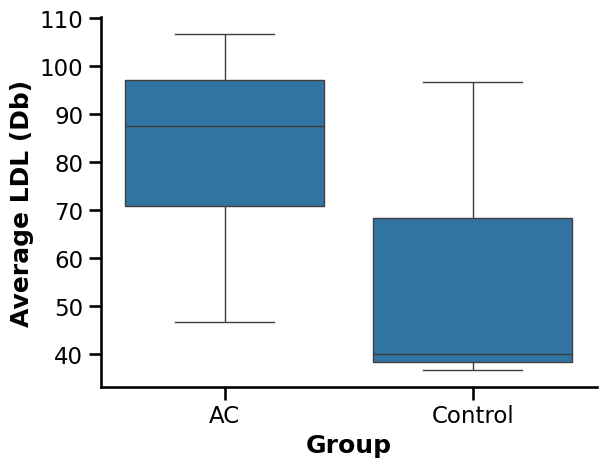

In [316]:

measurement = "Avg_LDL"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

sns.set_context("talk")
fig = sns.boxplot(data=df,x='Group', y = measurement)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
#fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("Average LDL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})

plt.show()

t test for Avg_HL


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.05546,2.283619,two-sided,0.96025,"[-17.91, 18.43]",0.047177,0.488,0.0506


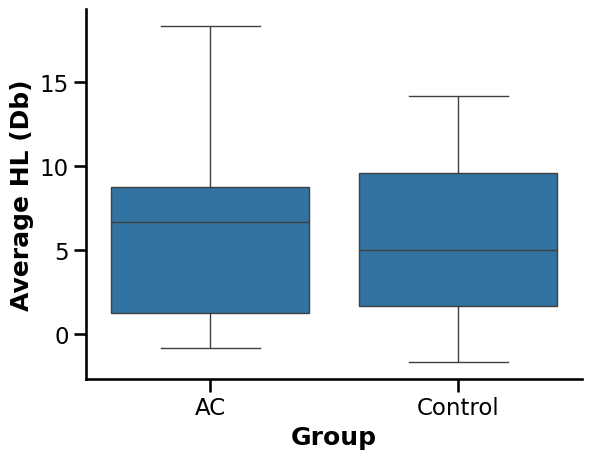

In [317]:
measurement = "Avg_HL"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

sns.set_context("talk")
fig = sns.boxplot(data=df,x='Group', y = measurement)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
#fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("Average HL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})

plt.show()

### TWI con HA y línea punteada de Avg controls (Cecere et al., 2015 y Ferri et al., 2018)

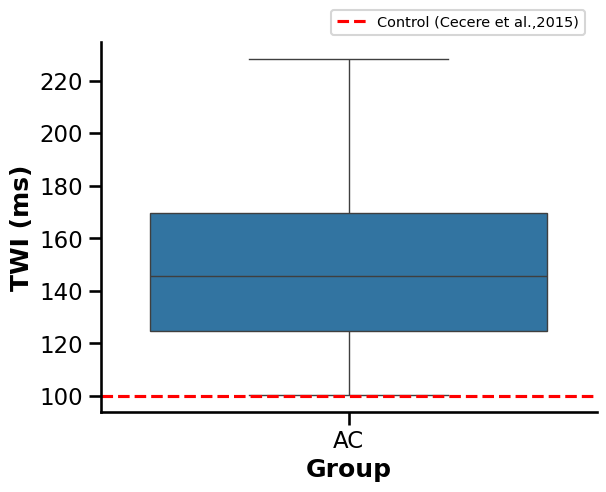

In [318]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA,x='Group', y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})
plt.axhline(100, label = "Control (Cecere et al.,2015)", c = "r", 
            linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(.45, 1))
plt.show()

Por si quieres ver TWI con low schizotypy según Ferri

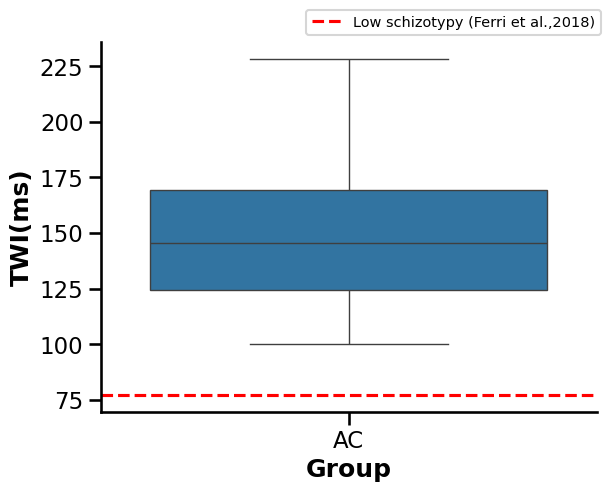

In [388]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA,x='Group', y = "TWI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("TWI(ms)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})
plt.axhline(77.14, label = "Low schizotypy (Ferri et al.,2018)", c = "r", 
            linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(.4, 1))
plt.show()

### OPI con HA y línea punteada de Avg low schizotypy group (Ferri et al., 2018)

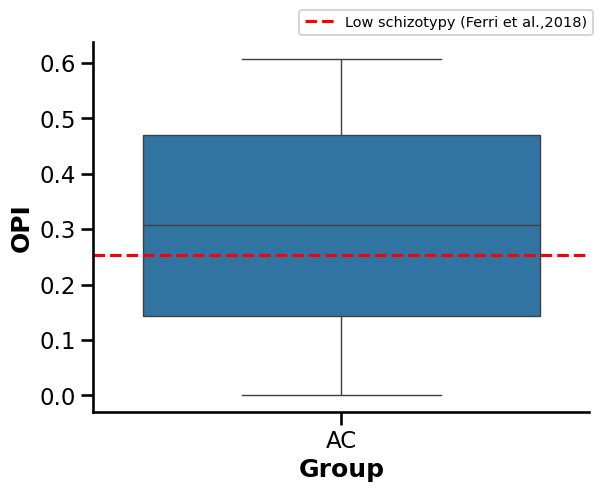

In [320]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA,x='Group', y = "OPI")
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_ylabel("OPI", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})
plt.axhline(.2524, label = "Low schizotypy (Ferri et al.,2018)", c = "r", 
            linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(.4, 1))
plt.show()

### Frequency mean for healthy person vs HA

Creo que este plot no va a servir mucho. En el manual de audiometría no hay rangos "normales", solo hay de diferentes grados de sordera. Cuando busqué, el "normal hearing range" es demasiado amplio y es el mismo para todas las frecuencias. Además, en lo que encontré no salían ni 250 ni 8000. 

#### Preprocessing

In [321]:
df_pointplots = df[['Código de participante', 'Group','LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000']]

In [343]:
# Split groups
df_pointplots_HA= df_pointplots[df_pointplots["Group"]=="AC"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for HA
df_pointplots_HA = pd.melt(df_pointplots_HA, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_HA["Group"] = "AC"

# Rename columns
df_pointplots_HA.columns = ["ID", "Frequency", "Db", "Group"]

In [379]:
df_pointplots_HA = df_pointplots_HA[df_pointplots_HA["Frequency"]!="HL_8000"]
df_pointplots_HA = df_pointplots_HA[df_pointplots_HA["Frequency"]!="HL_250"]

In [380]:
df_pointplots_HA["Frequency"].unique()

array(['HL_500', 'HL_1000', 'HL_2000', 'HL_4000'], dtype=object)

#### Plot

/var/folders/78/8gqygqxn7snfdc3z73g03hg00000gn/T/ipykernel_28652/4058535180.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([500, 1000, 2000, 4000])


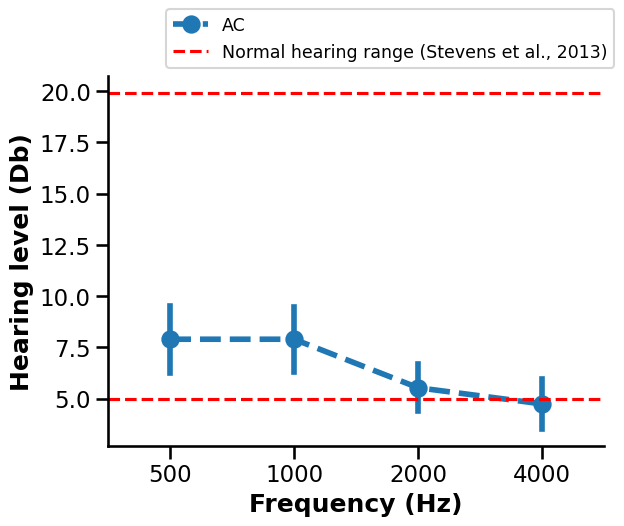

In [383]:
sns.set_context("talk")

fig = sns.pointplot(data=df_pointplots_HA,x='Frequency', y = "Db",  
               linestyles="--",errorbar="se",dodge=True, label = "AC")
#plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([500, 1000, 2000, 4000])
#plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000']) 
fig.set_xlabel("Frequency (Hz)", fontdict={'weight': 'bold'})
fig.set_ylabel("Hearing level (Db)", fontdict={'weight': 'bold'})
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

#handles, labels = fig.get_legend_handles_labels()
#fig.legend(handles=handles[2:], labels=labels[2:])
plt.axhline(5, label = "Normal hearing range (Stevens et al., 2013)", c = "r", 
            linestyle="--")

plt.axhline(19.9, c = "r", 
            linestyle="--")
fig.legend(fontsize="x-small", bbox_to_anchor=(0.1, 1))
plt.show()

### Average HC and 20s adults from korea

En este paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10808389/ encontre data de varios países. Aparentemente el HL varía por país. En la búsqueda que hice no encontré datos de Perú. Estoy poniendo abajo la media de Korea porque fue la más straightforward. Hay de otros lugares separado por frecuencia pero también separan por sexo y la situación se empieza a poner engorrosa. Nuevamente, parece varía considerablemente por país, con lo cual no creo que este promedio de Korea nos sirva de mucho, pero igual lo dejo.

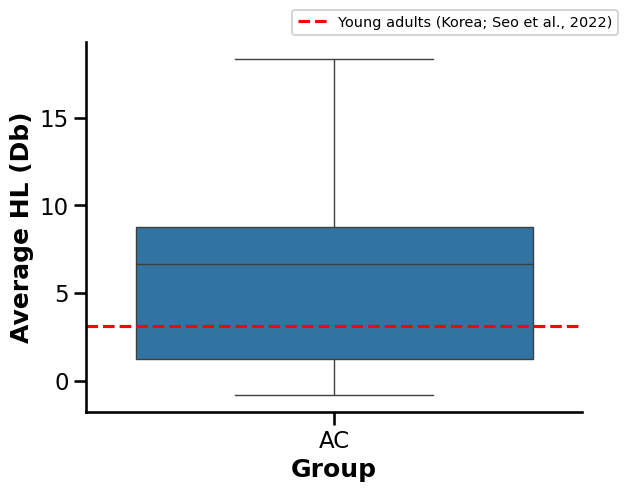

In [387]:
measurement = "Avg_HL"

sns.set_context("talk")
fig = sns.boxplot(data=df_HA,x='Group', y = measurement)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
#fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("Average HL (Db)", fontdict={'weight': 'bold'}) # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={'weight': 'bold'})
plt.axhline(3.1, label = "Young adults (Korea; Seo et al., 2022)", c = "r", 
            linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(.4, 1))
plt.show()